### Import packages

In [172]:
import sys
sys.path.append('../data_helpers/')
sys.path.append('../statistics/')
sys.path.append('../preprocess')
sys.path.append('../cluster/')

In [173]:
from twitter_data_helper import TwitterDataHelper
from reddit_data_helper import RedditDataHelper
from data_aggregator import DataAggregator
from statistics_aggregator import StatisticsAggregator
from text_cleaner import TextCleaner
from lda_cluster import LDACluster
from data_enhancer import DataOrganizer, SummarizeNER

In [174]:
import numpy as np
import pandas as pd
import json
import pickle
from time import time, sleep
from tqdm import tqdm

In [175]:
from text_cleaner import TextCleaner
text_cleaner = TextCleaner(filter_sentiment_words=True)

* [TextCleaner] Initializing...
* [TextCleaner] Loading SpaCy "en_core_web_md" corpus...
* [TextCleaner] Loading stopwords...
* [TextCleaner] Loading sentinent words...
--------------------------------------------------------------------------------------------------------------------


In [176]:
from gensim.corpora import Dictionary

### Get data

In [199]:
data_helper = DataAggregator()
date_range = ['2017-08-23', '2017-08-24']
df = data_helper.get_data(date_range=date_range)

In [200]:
df['source'].value_counts()

twitter    258
reddit      99
Name: source, dtype: int64

In [201]:
df[['source', 'created_at', 'author', 'text', 'url']]

,source,created_at,author,text,url
0,twitter,2017-08-23 14:06:01,stanfordnlp,TreeLSTMs! 😋 https://t.co/kqSWt4lZeb,https://twitter.com/smolix/status/897276847850...
1,twitter,2017-08-23 18:20:09,ncsc,We're looking forward to supporting #govcomm...,https://twitter.com/ukgovcomms/status/90041716...
2,twitter,2017-08-23 15:16:02,ncsc,Discover how we are blocking bad emails preten...,https://www.ncsc.gov.uk/news/ncsc-rolls-out-fr...
3,twitter,2017-08-23 13:44:39,ncsc,Did you hear @TheJeremyVine discussing passwor...,https://www.ncsc.gov.uk/guidance/password-coll...
4,twitter,2017-08-23 13:11:03,ncsc,Learn to love your passwords! Here's some pass...,https://www.ncsc.gov.uk/guidance/password-coll...
5,twitter,2017-08-23 11:23:02,ncsc,"You asked us to stop using shortened links, so...",https://twitter.com/i/web/status/9003174514764...
6,twitter,2017-08-23 09:50:03,ncsc,Threat Report: Malware incidents in internatio...,https://www.ncsc.gov.uk/report/weekly-threat-r...
7,twitter,2017-08-23 08:11:02,ncsc,Check out our glossary: cracking the buzzwords...,https://www.ncsc.gov.uk/glossary
8,twitter,2017-08-23 21:14:06,ConradLongmore,BBC News - Silk Road: Google search unmasked D...,http://www.bbc.co.uk/news/av/magazine-40977474...
9,twitter,2017-08-23 21:02:18,ConradLongmore,"Malware spam: ""Customer Service"" / ""Copy of In...",http://blog.dynamoo.com/2017/08/malware-spam-c...


### Clean text

In [202]:
texts = df['text']

In [203]:
docs = text_cleaner.clean(texts)

0it [00:00, ?it/s]

* [TextCleaner] Cleaning text...


357it [00:00, 1299.74it/s]


### Word Cloud (Show Top K words)
- K = vocabulary numbers / 2

In [204]:
from gensim.corpora import Dictionary
vocab = Dictionary(docs)

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=int(len(vocab)*0.5), background_color='white', width=600, height=300, max_font_size=50).generate(' '.join([' '.join(doc) for doc in docs]))

(-0.5, 599.5, 299.5, -0.5)

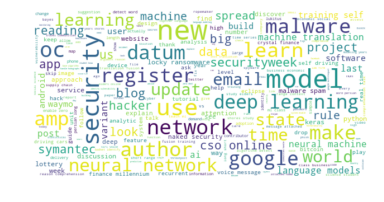

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## LDA - Topic Clustering

In [206]:
cluster = LDACluster(num_topics=10)
cluster.fit(docs)
cluster.model.print_topics()

* [LDA] Training model...


[(0,
  '0.016*"model" + 0.014*"machine" + 0.012*"training" + 0.012*"learning" + 0.012*"self" + 0.012*"waymo" + 0.010*"author" + 0.010*"base" + 0.009*"cars" + 0.009*"driving"'),
 (1,
  '0.015*"security" + 0.012*"real" + 0.012*"deep" + 0.010*"learning" + 0.010*"time" + 0.009*"networks" + 0.008*"new" + 0.007*"securityweek" + 0.007*"models" + 0.007*"training"'),
 (2,
  '0.012*"neural" + 0.011*"network" + 0.010*"networks" + 0.010*"language" + 0.010*"malware" + 0.010*"neural_networks" + 0.010*"learning" + 0.009*"long" + 0.008*"author" + 0.008*"oc"'),
 (3,
  '0.020*"new" + 0.017*"security" + 0.011*"use" + 0.010*"register" + 0.009*"ml" + 0.008*"student" + 0.008*"learn" + 0.008*"online" + 0.007*"science" + 0.007*"us"'),
 (4,
  '0.013*"security" + 0.012*"machine" + 0.010*"use" + 0.009*"oc" + 0.009*"attention" + 0.009*"time" + 0.009*"learn" + 0.008*"model" + 0.008*"email" + 0.008*"symantec"'),
 (5,
  '0.013*"security" + 0.011*"new" + 0.010*"machine" + 0.009*"neural" + 0.009*"amp" + 0.009*"world" 

### Topic distribution

In [207]:
df['cluster'] = cluster.labels
df['cluster'].value_counts()

9    51
0    42
3    41
6    40
2    38
1    38
5    30
8    29
7    25
4    23
Name: cluster, dtype: int64

### Post type distribution

In [186]:
stats_helper = StatisticsAggregator(df)
sdf = stats_helper.get_stats()

In [187]:
sdf['type'].value_counts()

unknown link                          19
paper                                 12
blog                                   6
shortened-link                         5
subreddit: /r/learnmachinelearning     4
subreddit: /r/MachineLearning          4
subreddit: /r/datascience              2
subreddit: /r/BigDataJobs              2
subreddit: /r/MLQuestions              1
subreddit: /r/computervision           1
dataset                                1
twitter status                         1
Name: type, dtype: int64

### Cross relation between post type and post sentiment

In [188]:
pd.crosstab(sdf.type,sdf.sentiment)

sentiment,neu
type,
blog,6
dataset,1
paper,12
shortened-link,5
subreddit: /r/BigDataJobs,2
subreddit: /r/MLQuestions,1
subreddit: /r/MachineLearning,4
subreddit: /r/computervision,1
subreddit: /r/datascience,2


### Blog

In [189]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'blog'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

* Date: 2017-08-24
* Text: [D] My Year at Brain
* Link: http://colinraffel.com/blog/my-year-at-brain.html
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] High Quality 3D Object Reconstruction from a Single Color Image
* Link: http://bair.berkeley.edu/blog/2017/08/23/high-quality-3d-obj-reconstruction/
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: Secret Sauce behind the beauty of Deep Learning: Beginners guide to Activation Functions
* Link: https://medium.com/@matelabs_ai/secret-sauce-behind-the-beauty-of-deep-learning-beginners-guide-to-activation-functions-a8e23a57d046
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: Exploring the Data Jungle - a free eBook on discovering, taming, and studying the 

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Code

In [190]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'code'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### News

In [191]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'news'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Paper

In [192]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'paper'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

* Date: 2017-08-24
* Text: [R] [1708.04782] StarCraft II: A New Challenge for Reinforcement Learning
* Link: https://arxiv.org/abs/1708.04782
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] [1708.07120] Super-Convergence: Very Fast Training of Residual Networks Using Large Learning Rates
* Link: https://arxiv.org/abs/1708.07120
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R][1703.00381] The Statistical Recurrent Unit
* Link: https://arxiv.org/abs/1703.00381
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] [1708.06834] Skip RNN: Learning to Skip State Updates in Recurrent Neural Networks
* Link: https://arxiv.org/abs/1708.06834
---------------------------------------------------------------------

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Sentiment Distribution

In [193]:
sdf['sentiment'].value_counts()

neu    58
Name: sentiment, dtype: int64

### Positive posts

In [194]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['sentiment'] == 'pos'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Negative posts

In [195]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['sentiment'] == 'neg'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### All posts ranked by "hotness"

In [196]:
for i, row in sdf.sort_values('hotness', ascending=False).iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

* Date: 2017-08-24
* Text: Each week for the last few months, I bought 3 Powerball tickets for $6 and invested $6 into a Robo-Advisor App to compare return on investment [OC]
* Link: https://i.redd.it/83lzi108njhz.png
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: Canada's rank as a trade export partner for each US state [OC]
* Link: https://i.redd.it/nm9qudgemjhz.png
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: Church fires in Norway by decade and cause [OC]
* Link: https://i.redd.it/gpat74clgjhz.png
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: Roboinvesting vs Lottery (fixed) [OC]
* Link: http://i.imgur.com/z8djsQn.png
-------------------------------------------------------------------------------

## Extract keywords (name entities) from text

In [197]:
se = SummarizeNER(sdf)

In [198]:
for i, phrase in enumerate(se.cleaned_phrases):
    if type(phrase) == tuple and phrase != 'N/A':
        print(i, phrase[0])

0 DMARC
1 Army
2 Yahoo US
3 Didier Stevens Quickpost
4 Neural Multi Document Summarization
5 Lexicon Integrated CNN
8 Neural Network Approach for Mixing Language Models
9 Discovering Political Topics in Facebook Discussion
20 IMDB
21 UC Irvine Data Science Undergraduate
25 Adverserial Attacks
26 R
30 Bayes
31 Fink Analytics
37 Siri
41 Canada US
44 Norway
49 Healthcare
55 Waymo
56 NaturalScript Human Language For Machines
57 R High Quality D Object Reconstruction
